In [1]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session

service = QiskitRuntimeService()

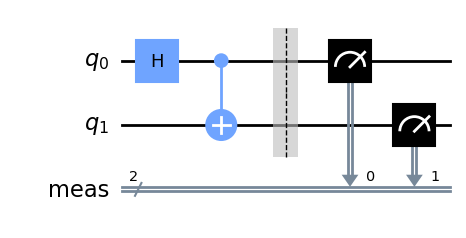

In [2]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

qc.draw('mpl')

In [ ]:
backend = service.get_backend('ibm_lagos')

with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    job = sampler.run(circuits=qc)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
job.result()

In [ ]:
from qiskit.visualization import plot_histogram

plot_histogram(job.result().quasi_dists[0].binary_probabilities())

In [ ]:
job.inputs['circuits'][0].draw('mpl')

In [ ]:
print(job.logs())

In [ ]:
from friends import retrieve_observable_and_ansatz
obsv, qc, params = retrieve_observable_and_ansatz()

In [ ]:
obsv

In [ ]:
qc.draw('mpl', fold=-1)

In [ ]:
params

In [ ]:
with Session(service=service, backend=backend) as session:
    estimator = Estimator()
    job = estimator.run(circuits=qc, observables=obsv, parameter_values=params)

In [ ]:
job.result()